In [22]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

#  VERİ KEŞFİ VE ÖN İŞLEME (EDA)

In [24]:
df = pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")

In [25]:
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [27]:
# Hangi sütunda kaç tane NaN deger var onu görmek için isnull kullanıyoruz
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [28]:
# Sayısal sütunların ortalaması, standart sapması, min/max değerlerine bakıyoruz describe kullanarak
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [29]:
#'id' 'Unnamed: 32' isminde gereksiz kullanılmayan sütunu kaldırıyoruz 
cols_to_drop = ['id']
if 'Unnamed: 32' in df.columns:
    cols_to_drop.append('Unnamed: 32')

df = df.drop(columns=cols_to_drop, errors='ignore')

In [30]:
# Hedef Değişken Dönüşümü: M (Kötü) -> 1, B (İyi) -> 0
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [31]:
print("Temizlik sonrası sütunlar:", df.columns.tolist())
print("\nSınıf Dağılımı (1=M, 0=B):")
print(df['diagnosis'].value_counts())

Temizlik sonrası sütunlar: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Sınıf Dağılımı (1=M, 0=B):
diagnosis
0    357
1    212
Name: count, dtype: int64


# AYKIRI DEĞER ANALİZİ

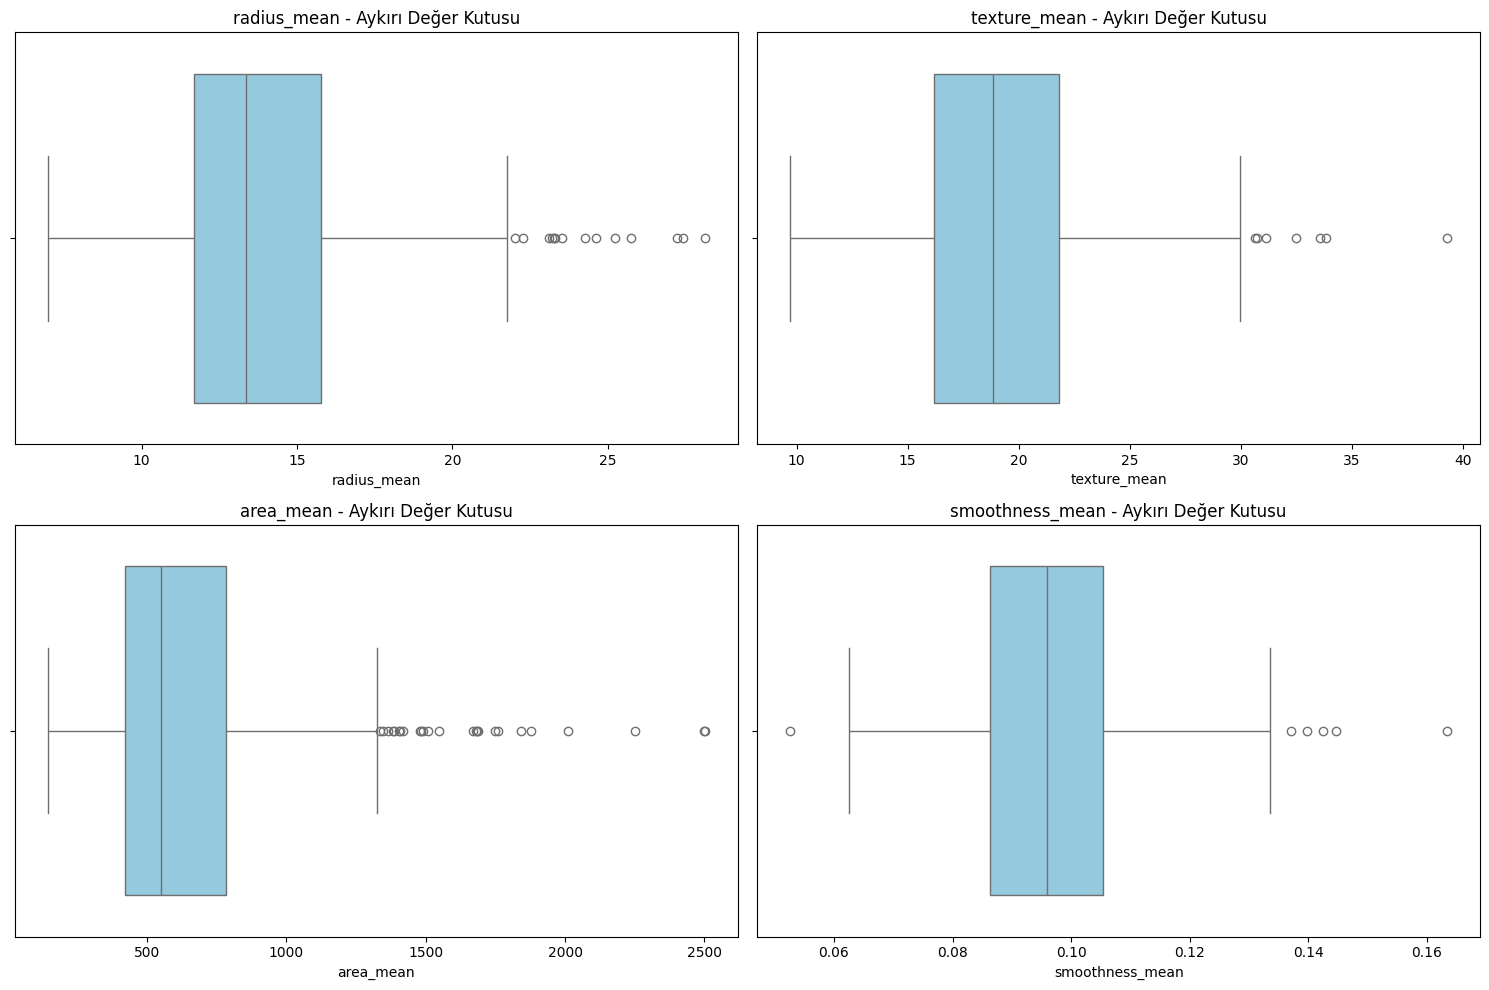

In [32]:
features_to_check = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_check):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'{col} - Aykırı Değer Kutusu')
plt.tight_layout()
plt.show()

In [33]:
# İstatistiksel Analiz
Q1 = df['area_mean'].quantile(0.25)
Q3 = df['area_mean'].quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR
aykirilar = df[(df['area_mean'] < alt_sinir) | (df['area_mean'] > ust_sinir)]
print(f"'area_mean' için Aykırı Değer Sayısı: {len(aykirilar)}")
print(f"Normal Aralık: {alt_sinir:.2f} ile {ust_sinir:.2f}")

'area_mean' için Aykırı Değer Sayısı: 25
Normal Aralık: -123.30 ile 1326.30


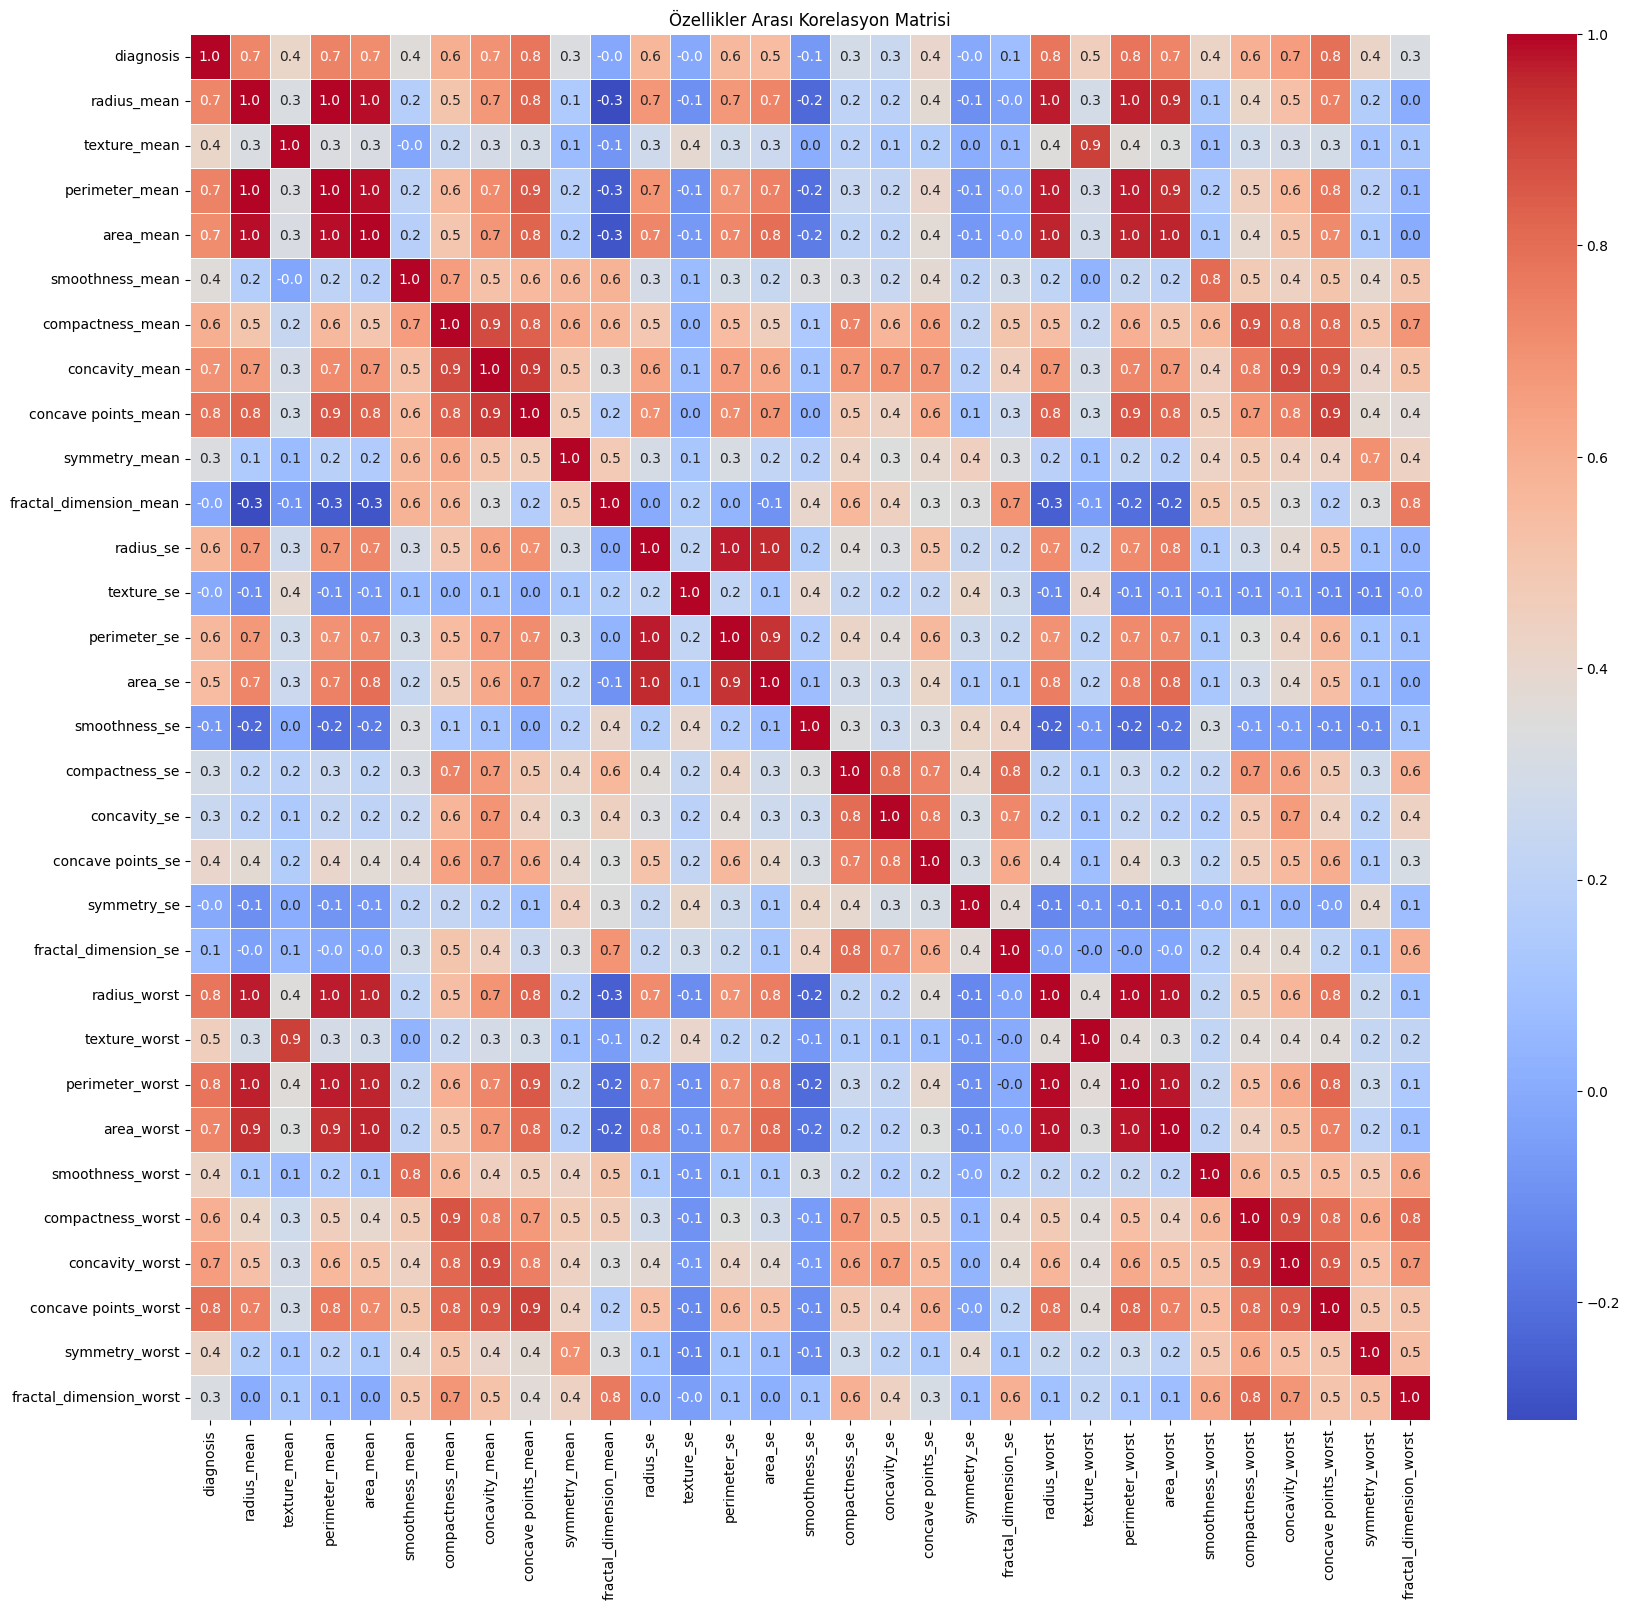

In [34]:
# Korelasyon Haritası
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()

# MODEL EĞİTİMİNE HAZIRLIK


In [35]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [36]:
# Eğitim (%80) ve Test (%20) setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Ölçeklendirme (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  MODEL EĞİTİMİ VE DEĞERLENDİRME


In [38]:
def model_raporu(model, isim, X_test_verisi):
    y_pred = model.predict(X_test_verisi)
    print(f"\n--- {isim} Sonuçları ---")
    print(f"Accuracy (Doğruluk): {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{isim} Hata Matrisi')
    plt.xlabel('Tahmin')
    plt.ylabel('Gerçek')
    plt.show()


--- Logistic Regression Sonuçları ---
Accuracy (Doğruluk): 0.9649
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



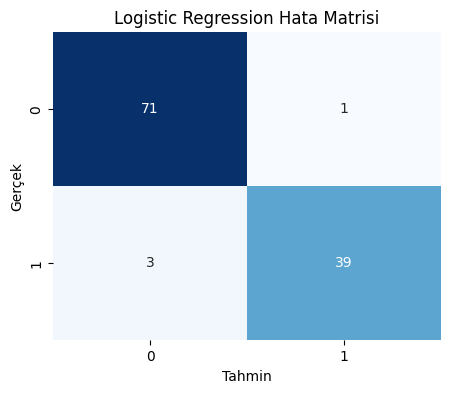

In [39]:
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
model_raporu(lr, "Logistic Regression", X_test_scaled)


--- Random Forest Sonuçları ---
Accuracy (Doğruluk): 0.9737
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



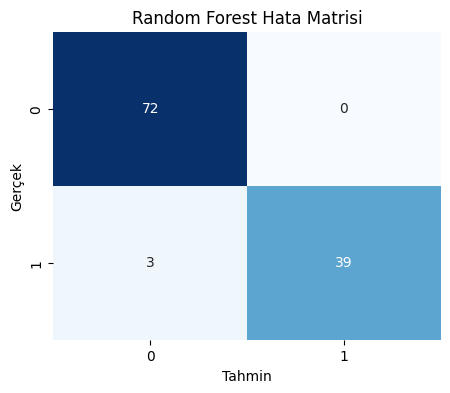

In [40]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
model_raporu(rf, "Random Forest", X_test)

In [48]:
def overfit_underfit_kontrol(model, isim, X_train_data, X_test_data):
    """Eğitim ve Test Başarılarını Kıyaslayarak Overfitting Kontrolü Yapar"""
    y_train_pred = model.predict(X_train_data)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = model.predict(X_test_data)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"\n[{isim}] İÇİN OVERFITTING KONTROLÜ:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Fark           : {train_acc - test_acc:.4f}")
    
    if train_acc < 0.80 and test_acc < 0.80:
        print("SONUÇ: UNDERFITTING .")
    elif (train_acc - test_acc) > 0.10:
        print("SONUÇ: OVERFITTING.")
    else:
        print("SONUÇ: BAŞARILI.")
    print("-" * 40)


--- Logistic Regression Performans Raporu ---
Accuracy (Doğruluk): 0.9649
ROC AUC Score: 0.9960

Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



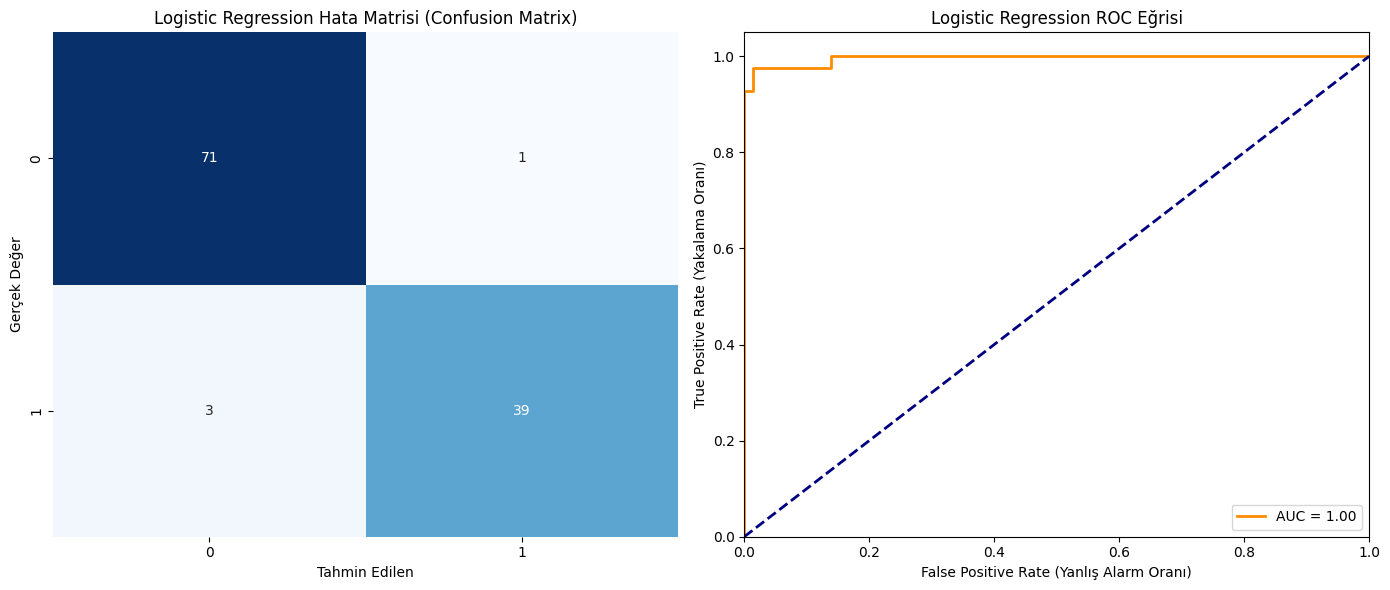


--- Random Forest Performans Raporu ---
Accuracy (Doğruluk): 0.9737
ROC AUC Score: 0.9929

Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



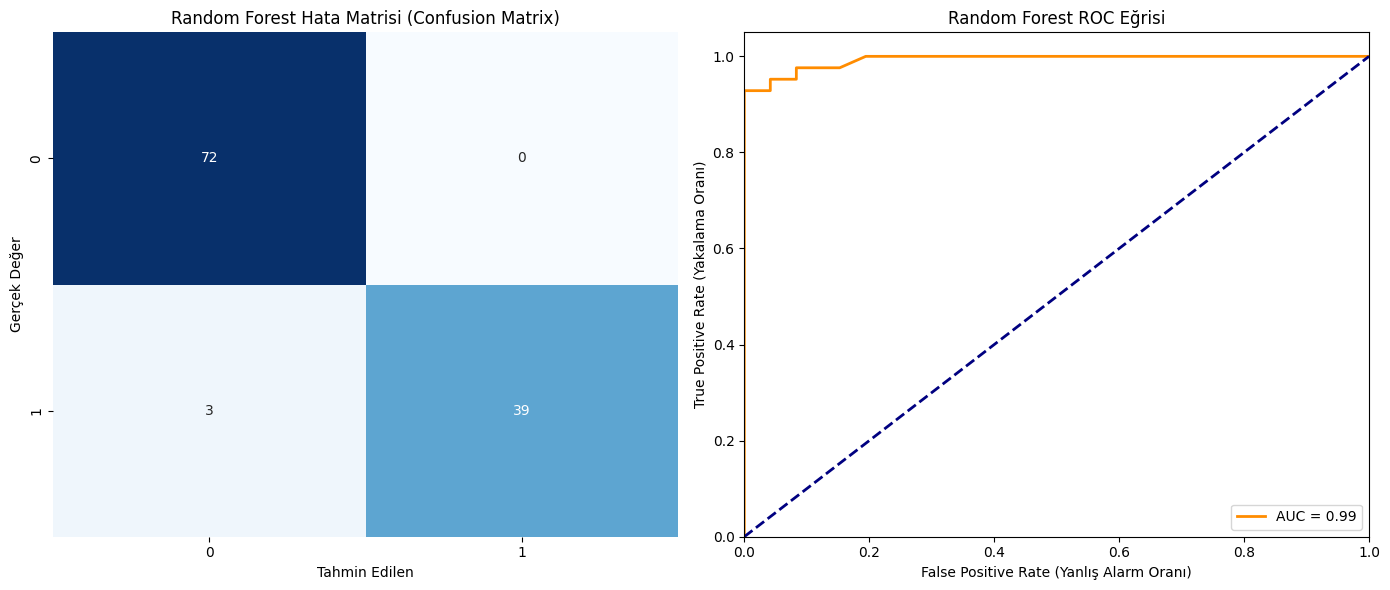


[Random Forest] İÇİN OVERFITTING KONTROLÜ:
Train Accuracy : 1.0000
Test Accuracy  : 0.9737
Fark           : 0.0263
SONUÇ: BAŞARILI.
----------------------------------------

[Logistic Regression] İÇİN OVERFITTING KONTROLÜ:
Train Accuracy : 0.9868
Test Accuracy  : 0.9649
Fark           : 0.0219
SONUÇ: BAŞARILI.
----------------------------------------


In [49]:
def detayli_degerlendirme(model, isim, X_test_verisi, y_test):
    # Tahminler
    y_pred = model.predict(X_test_verisi)
    y_prob = model.predict_proba(X_test_verisi)[:, 1] 
    
    print(f"\n--- {isim} Performans Raporu ---")
    print(f"Accuracy (Doğruluk): {accuracy_score(y_test, y_pred):.4f}")
    
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC Score: {auc_score:.4f}")
    
    print("\nDetaylı Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
    ax[0].set_title(f'{isim} Hata Matrisi (Confusion Matrix)')
    ax[0].set_xlabel('Tahmin Edilen')
    ax[0].set_ylabel('Gerçek Değer')
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate (Yanlış Alarm Oranı)')
    ax[1].set_ylabel('True Positive Rate (Yakalama Oranı)')
    ax[1].set_title(f'{isim} ROC Eğrisi')
    ax[1].legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

detayli_degerlendirme(lr, "Logistic Regression", X_test_scaled, y_test)
detayli_degerlendirme(rf, "Random Forest", X_test, y_test)
overfit_underfit_kontrol(rf, "Random Forest", X_train, X_test)
overfit_underfit_kontrol(lr, "Logistic Regression", X_train_scaled, X_test_scaled)
